# Station of Neuchâtel

Station : NEU (Neuchâtel), precipitation dataset `rre150d0`

Daily total precipitation, from 6 UTC to 6 UTC (next day)

Temporal coverage: 31.12.1863 - 31.12.2023

Homogenized data: 1864 – 2010

Displayed data: 1864 - 2023


In [ ]:
# Packages for data processing
install.packages("dplyr")
library(dplyr)

install.packages("ggplot2")
library(ggplot2)

install.packages("zoo")
library(zoo)

In [ ]:
# Preprocessing
url <- "https://raw.githubusercontent.com/cutiips/Master-Thesis/main/NEU_rre150d0.txt"
NEU_P <- read.table(url, header = TRUE, as.is = FALSE, sep = ";")

colnames(NEU_P)[2] <- "date"
colnames(NEU_P)[3] <- "precip"

NEU_P$date <- as.Date(as.character(NEU_P$date), format = "%Y%m%d")
NEU_P$year <- format(NEU_P$date, "%Y")
NEU_P$month <- format(NEU_P$date, "%m")
NEU_P$Year <- as.numeric(NEU_P$year)
NEU_P$month <- as.numeric(NEU_P$month)
NEU_P$precip <- as.numeric(NEU_P$precip)

In [ ]:
# Check for missing values
sum(is.na(NEU_P))

[1] 0

## R10mm

In [ ]:
# Annual count of days with precipitation ≥ 10 mm
R10mm_days_NEU <- NEU_P[NEU_P$precip >= 10, ]
R10mm_summary_NEU <- aggregate(R10mm_days_NEU$precip,
  by = list(Year = R10mm_days_NEU$year), FUN = length)
colnames(R10mm_summary_NEU)[2] <- "Count_R10mm_NEU"
R10mm_summary_NEU$Year <- as.numeric(R10mm_summary_NEU$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R10mm_NEU <- lm(Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)
summary(model_R10mm_NEU)


Call:
lm(formula = Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1021  -5.6912  -0.6331   5.4354  23.7746 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 17.940667  24.772071   0.724    0.470
Year         0.006851   0.012743   0.538    0.592

Residual standard error: 7.445 on 158 degrees of freedom
Multiple R-squared:  0.001826,	Adjusted R-squared:  -0.004491 
F-statistic: 0.2891 on 1 and 158 DF,  p-value: 0.5916


In [ ]:
# Data homogenization period (NEU) : 1864 to 2010
R10mm_summary_NEU$Dataset <- ifelse(R10mm_summary_NEU$Year <= 2010,
                                    "homogenized","non-homogenized")
R10mm_homog_NEU <- R10mm_summary_NEU[R10mm_summary_NEU$Dataset == "homogenized", ]

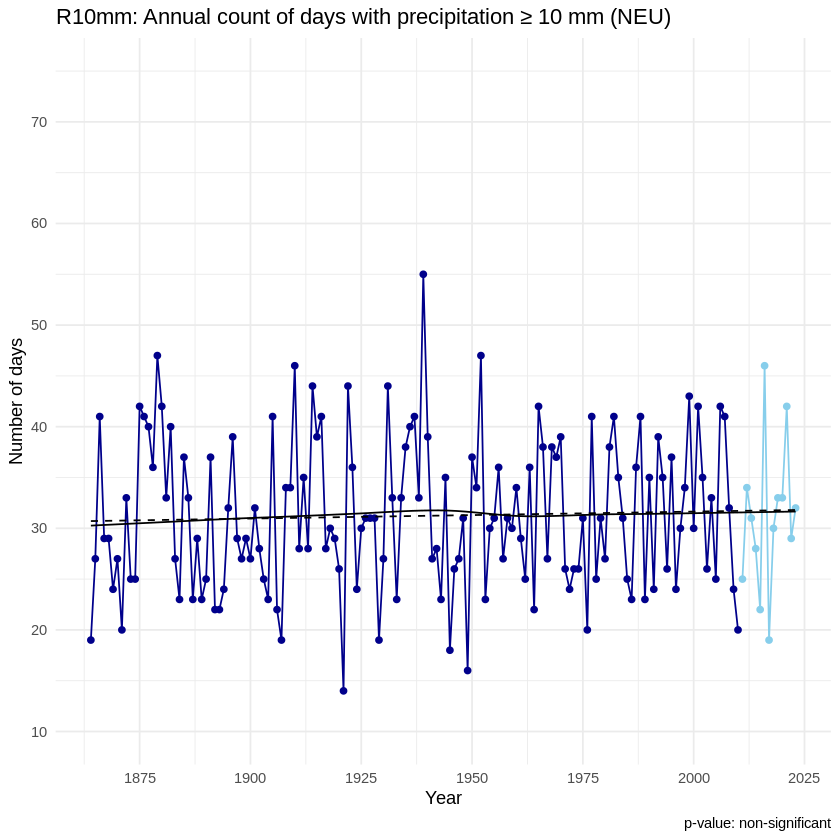

In [ ]:
# Graph with data homogenization period
ggplot(R10mm_summary_NEU, aes(x = Year, y = Count_R10mm_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R10mm: Annual count of days with precipitation ≥ 10 mm (NEU)",
  x = "Year",y = "Number of days",
  caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(10, 75), breaks = seq(10, 75, by = 10)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R10mm_homog_NEU <- mean(R10mm_homog_NEU$Count_R10mm_NEU, na.rm = TRUE)

# Usual range
range_R10mm_homog_NEU <- quantile(R10mm_homog_NEU$Count_R10mm,
  probs = c(0.05, 0.95), na.rm = TRUE)

## R95p

Total annual precipitation from days exceeding the 95th percentile,

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period  

In [ ]:
# 95th percentile for wet days (1961–1990)
NEU_reference_period <- NEU_P[NEU_P$date >= as.Date("1961-01-01") & NEU_P$date <= as.Date("1990-12-31") &
  NEU_P$precip >= 1, ]
threshold_95_NEU <- quantile(NEU_reference_period$precip, 0.95, na.rm = TRUE)


In [ ]:
# Days above the 95th percentile, and compute annual total
R95p_summary_NEU <- NEU_P[NEU_P$precip >= 1 & NEU_P$precip > threshold_95_NEU, ]
R95p_summary_NEU <- aggregate(R95p_summary_NEU$precip,
  by = list(Year = R95p_summary_NEU$year),FUN = sum, na.rm = TRUE)
colnames(R95p_summary_NEU)[2] <- "Total_R95p_NEU"
R95p_summary_NEU$Year <- as.numeric(R95p_summary_NEU$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R95p_NEU <- lm(Total_R95p_NEU ~ Year, data = R95p_summary_NEU)
summary(model_R95p_NEU)


Call:
lm(formula = Total_R95p_NEU ~ Year, data = R95p_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-166.86  -78.00  -16.33   53.18  333.38 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 370.48066  359.40548   1.031    0.304
Year         -0.07693    0.18487  -0.416    0.678

Residual standard error: 108 on 158 degrees of freedom
Multiple R-squared:  0.001095,	Adjusted R-squared:  -0.005228 
F-statistic: 0.1731 on 1 and 158 DF,  p-value: 0.6779


In [ ]:
# Data homogenization period (NEU) : 1864 to 2010
R95p_summary_NEU$Dataset <- ifelse(R95p_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
R95p_homog_NEU <- R95p_summary_NEU[R95p_summary_NEU$Dataset == "homogenized", ]

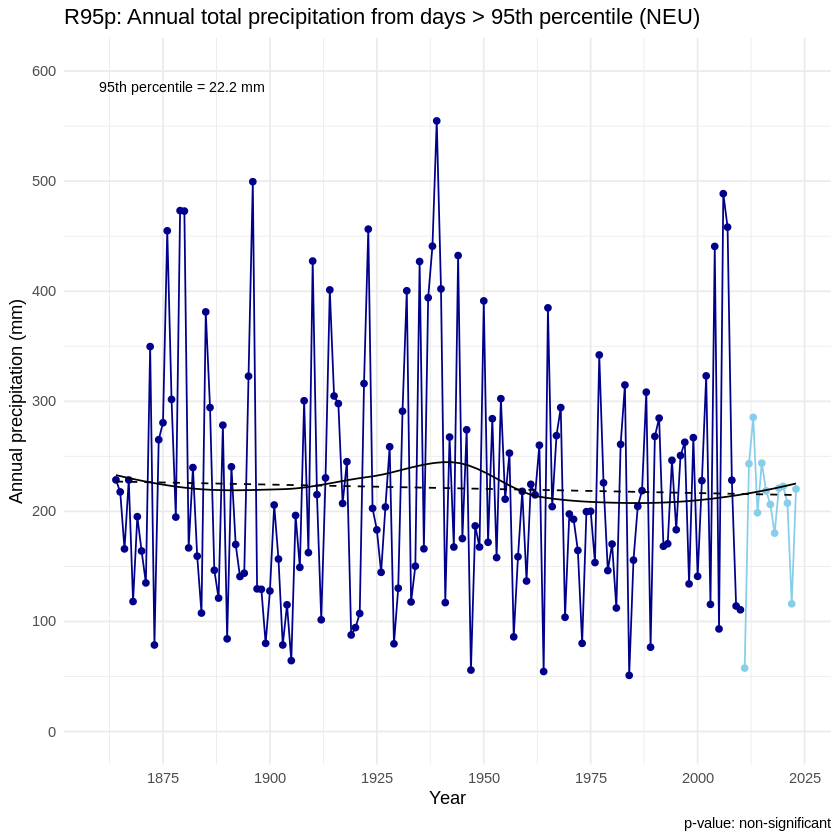

In [ ]:
# Graph with data homogenization period
ggplot(R95p_summary_NEU, aes(x = Year, y = Total_R95p_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R95p: Annual total precipitation from days > 95th percentile (NEU)",
  x = "Year", y = "Annual precipitation (mm)", caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 100)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1860, y = 590, label = "95th percentile = 22.2 mm", hjust = 0, vjust = 1, size = 3, color = "black")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R95p_homog_NEU <- mean(R95p_homog_NEU$Total_R95p_NEU, na.rm = TRUE)

# Range
range_R95p_homog_NEU <- quantile(R95p_homog_NEU$Total_R95p_NEU,
  probs = c(0.05, 0.95), na.rm = TRUE)


## Complementary approach : R95p days

Annual count of days with precipitation > 95th percentile

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period

In [ ]:
# 95th percentile for wet days (1961–1990)
NEU_reference_period <- NEU_P[NEU_P$date >= as.Date("1961-01-01") & NEU_P$date <= as.Date("1990-12-31") &
  NEU_P$precip >= 1, ]
threshold_95_days_NEU <- quantile(NEU_reference_period$precip, 0.95, na.rm = TRUE)

In [ ]:
# Number of days per year exceeding this threshold
R95p_days_summary_NEU <- NEU_P[NEU_P$precip > threshold_95_days_NEU, ]
R95p_days_summary_NEU <- aggregate(R95p_days_summary_NEU$precip,
  by = list(Year = R95p_days_summary_NEU$year),FUN = length)
colnames(R95p_days_summary_NEU)[2] <- "Days_R95p_NEU"
R95p_days_summary_NEU$Year <- as.numeric(R95p_days_summary_NEU$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R95p_days_NEU <- lm(Days_R95p_NEU ~ Year, data = R95p_days_summary_NEU)
summary(model_R95p_days_NEU)


Call:
lm(formula = Days_R95p_NEU ~ Year, data = R95p_days_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3130 -2.4291 -0.2738  1.3299 10.9917 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 15.961354  11.239817   1.420    0.158
Year        -0.004617   0.005782  -0.799    0.426

Residual standard error: 3.378 on 158 degrees of freedom
Multiple R-squared:  0.00402,	Adjusted R-squared:  -0.002283 
F-statistic: 0.6378 on 1 and 158 DF,  p-value: 0.4257


In [ ]:
# Data homogenization period (NEU) : 1864 to 2010
R95p_days_summary_NEU$Dataset <- ifelse(R95p_days_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
R95p_days_homog_NEU <- R95p_days_summary_NEU[R95p_days_summary_NEU$Dataset == "homogenized", ]

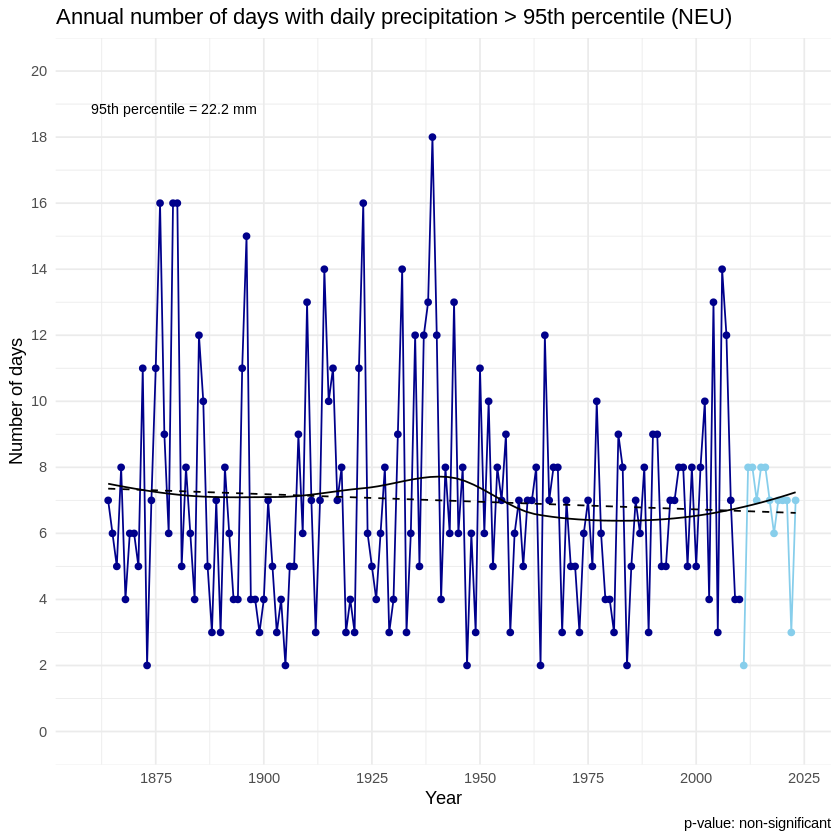

In [ ]:
# Graph with data homogenization period
ggplot(R95p_days_summary_NEU, aes(x = Year, y = Days_R95p_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Annual number of days with daily precipitation > 95th percentile (NEU)",
  x = "Year", y = "Number of days",
  caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(0, 20), breaks = seq(0, 20, by = 2)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1860, y = 19,
  label = paste0("95th percentile = ", round(threshold_95_days_NEU, 1), " mm"), hjust = 0, vjust = 1, size = 3, color = "black")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R95p_days_homog_NEU <- mean(R95p_days_homog_NEU$Days_R95p_NEU, na.rm = TRUE)

# Range
range_R95p_days_homog_NEU <- quantile(R95p_days_homog_NEU$Days_R95p_NEU,
 probs = c(0.05, 0.95),na.rm = TRUE)

## Rx1day

In [ ]:
# Annual maximum of daily precipitation
Rx1day_summary_NEU <- aggregate(NEU_P$precip,
  by = list(Year = NEU_P$year), FUN = max, na.rm = TRUE)
colnames(Rx1day_summary_NEU)[2] <- "Yearly_Max_Rx1day_NEU"
Rx1day_summary_NEU$Year <- as.numeric(Rx1day_summary_NEU$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_Rx1day_NEU <- lm(Yearly_Max_Rx1day_NEU ~ Year, data = Rx1day_summary_NEU)
summary(model_Rx1day_NEU)


Call:
lm(formula = Yearly_Max_Rx1day_NEU ~ Year, data = Rx1day_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.637  -8.699  -1.856   4.458  69.559 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 35.638312  45.736625   0.779    0.437
Year         0.005594   0.023526   0.238    0.812

Residual standard error: 13.74 on 158 degrees of freedom
Multiple R-squared:  0.0003577,	Adjusted R-squared:  -0.005969 
F-statistic: 0.05653 on 1 and 158 DF,  p-value: 0.8124


In [ ]:
# Data homogenization period (NEU) : 1864 to 2010
Rx1day_summary_NEU$Dataset <- ifelse(Rx1day_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
Rx1day_homog_NEU <- Rx1day_summary_NEU[Rx1day_summary_NEU$Dataset == "homogenized", ]

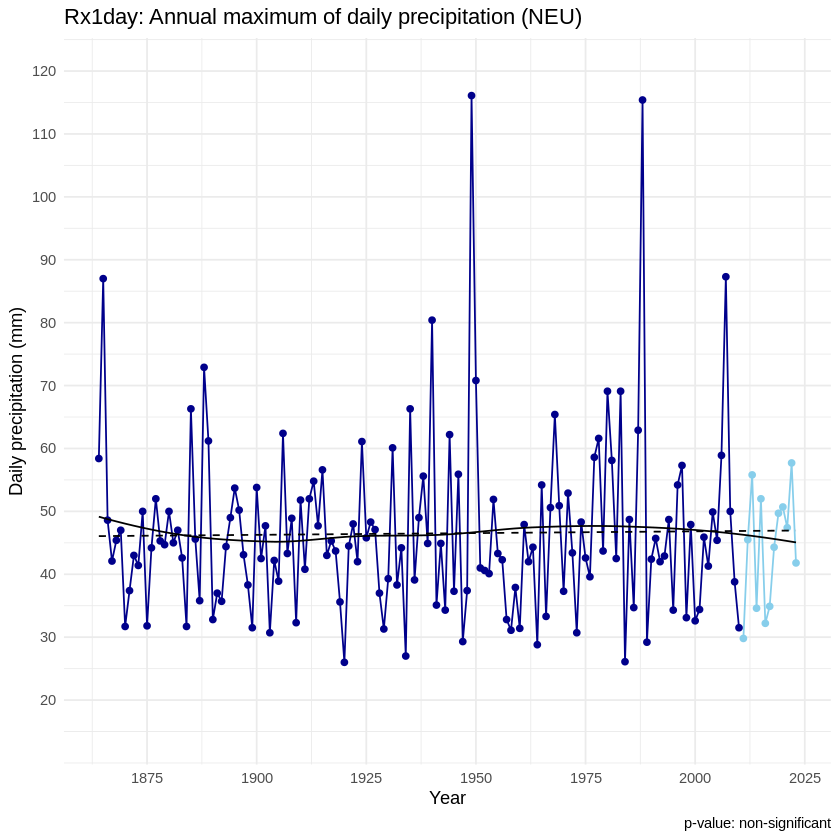

In [ ]:
# Graph with data homogenization period
ggplot(Rx1day_summary_NEU, aes(x = Year, y = Yearly_Max_Rx1day_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Rx1day: Annual maximum of daily precipitation (NEU)",
  x = "Year",y = "Daily precipitation (mm)",
  caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(15, 120), breaks = seq(20, 120, by = 10)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_Rx1day_homog_NEU <- mean(Rx1day_homog_NEU$Yearly_Max_Rx1day_NEU, na.rm = TRUE)

# Range
range_Rx1day_homog_NEU <- quantile(Rx1day_homog_NEU$Yearly_Max_Rx1day_NEU,
  probs = c(0.05, 0.95),na.rm = TRUE)

## CWD

Maximum number of consecutive wet days

In [ ]:
# Binary wet day indicator
NEU_P$Wet_Day <- ifelse(NEU_P$precip >= 1, 1, 0)

In [ ]:
# Create the loop to compute the maximum wet spell length
CWD_summary_NEU <- data.frame(Year = unique(NEU_P$year), Max_CWD_NEU = NA)
for (i in seq_along(CWD_summary_NEU$Year))
  {year_data <- NEU_P[NEU_P$year == CWD_summary_NEU$Year[i], ]
  rle_wet <- rle(year_data$Wet_Day)
  CWD_summary_NEU$Max_CWD_NEU[i] <- if (any(rle_wet$values == 1))
  {max(rle_wet$lengths[rle_wet$values == 1], na.rm = TRUE)}
  else
  {0}}
CWD_summary_NEU$Year <- as.numeric(CWD_summary_NEU$Year)

In [ ]:
# Linear trend analysis (based on all available data)
model_CWD_NEU <- lm(Max_CWD_NEU ~ Year, data = CWD_summary_NEU)
summary(model_CWD_NEU)


Call:
lm(formula = Max_CWD_NEU ~ Year, data = CWD_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3424 -1.3268 -0.3144  0.9664  5.7415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 5.841274   6.851376   0.853    0.395
Year        0.001272   0.003524   0.361    0.719

Residual standard error: 2.059 on 158 degrees of freedom
Multiple R-squared:  0.0008232,	Adjusted R-squared:  -0.005501 
F-statistic: 0.1302 on 1 and 158 DF,  p-value: 0.7187


In [ ]:
# Data homogenization period (NEU) : 1864 to 2010
CWD_summary_NEU$Dataset <- ifelse(CWD_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
CWD_homog_NEU <- CWD_summary_NEU[CWD_summary_NEU$Dataset == "homogenized", ]

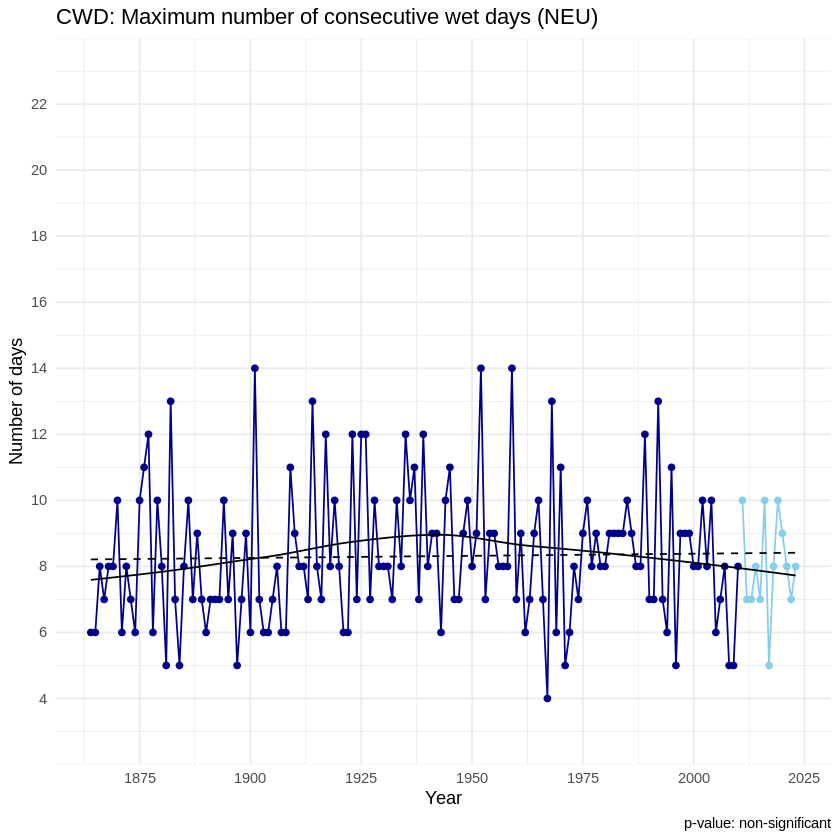

In [ ]:
# Graph with data homogenization period
ggplot(CWD_summary_NEU, aes(x = Year, y = Max_CWD_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "CWD: Maximum number of consecutive wet days (NEU)",
  x = "Year",y = "Number of days",caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(3, 23), breaks = seq(4, 23, by = 2)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_CWD_homog_NEU <- mean(CWD_homog_NEU$Max_CWD_NEU, na.rm = TRUE)

# Range
range_CWD_homog_NEU <- quantile(CWD_homog_NEU$Max_CWD_NEU,
  probs = c(0.05, 0.95),  na.rm = TRUE)